In [1]:
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read dataset

Reading in the train images dataset into X_train

In [2]:
f = gzip.open(r'mnist\train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(28 * 28 * 60000)
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

Reading in the train labels into Y_train

In [3]:
f = gzip.open(r'mnist\train-labels-idx1-ubyte.gz', 'r')
f.read(8)
buf = f.read(60000)
Y_train = np.frombuffer(buf, dtype = np.int8)
f.close()
Y_train.shape

(60000,)

In [4]:
X_train[0].shape

(784,)

Reading in the test data and labels

In [5]:
f = gzip.open(r'mnist\t10k-images-idx3-ubyte.gz')
f.read(16)
buf = f.read(28 * 28 * 60000)
x_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_test = x_test.reshape(-1, 28 * 28)
f.close()
f = gzip.open(r'mnist\t10k-labels-idx1-ubyte.gz')
f.read(8)
buf = f.read(60000)
y_test = np.frombuffer(buf, dtype = np.int8)
f.close()
print('x_test shape: ', end='')
print(x_test.shape)
print('y_test shape: ', end='')
print(y_test.shape)

x_test shape: (10000, 784)
y_test shape: (10000,)


## 2. Examine Dataset

In [6]:
def plot_images(indices, x, y = None, labels = False):
    '''
    Indices should be a list of 20 numbers which indicates which numbers to draw \n
    x -> Image data \n
    y -> Label of the image \n
    labels -> (bool) Show digit labels \n
    '''
    plt.figure(figsize=(14, 12))
    for i, num in enumerate(indices):
        plt.subplot(4,5,i+1)
        if labels:
            plt.title('Label: ' + str(y[num]))
        plt.xticks([])
        plt.yticks([])
        img = x[num].reshape(28, 28, 1)
        plt.imshow(img, cmap=plt.get_cmap('gray'))

Examining how the first 20 images look like in the training set

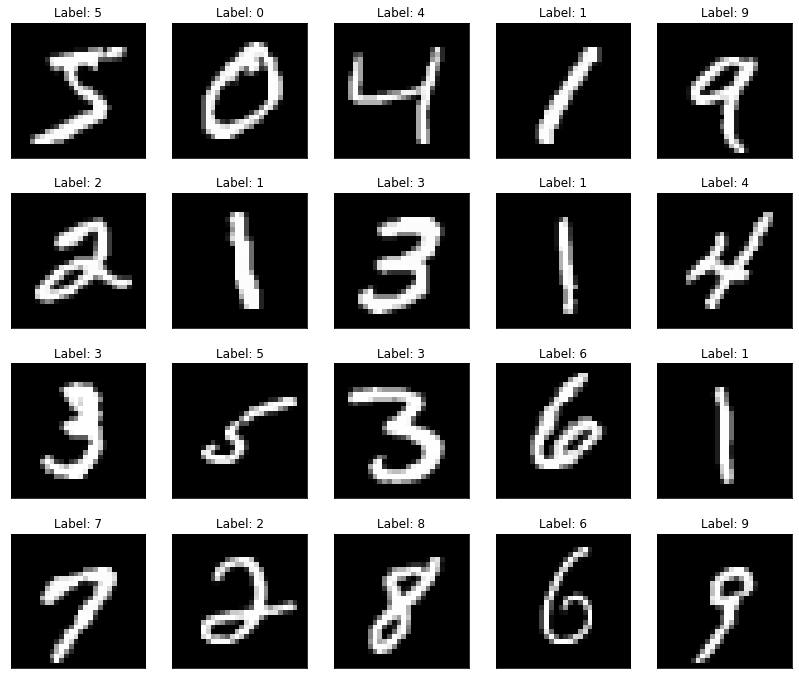

In [7]:
plot_images(range(20), X_train, Y_train, labels=True)

Running the same operation on test data to ensure file was read properly

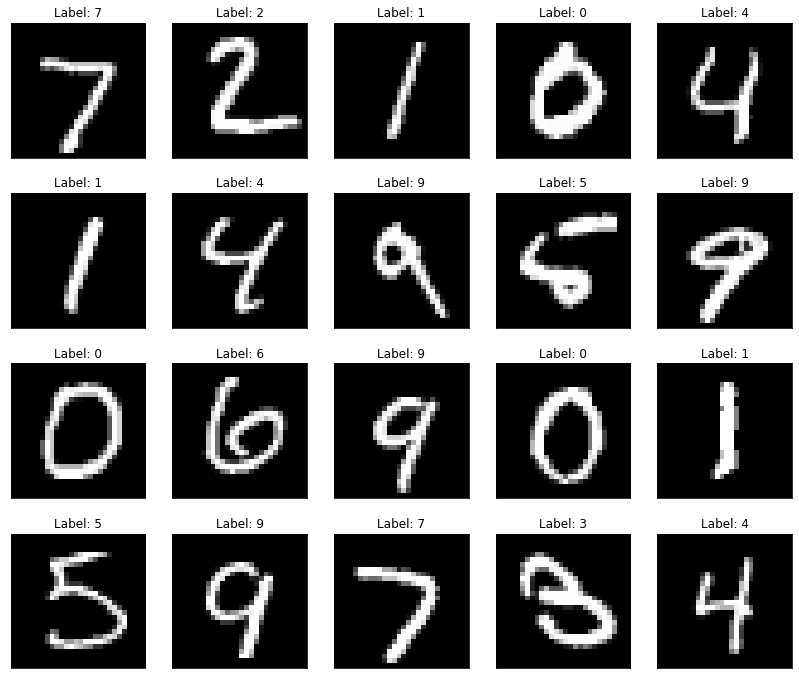

In [8]:
plot_images(range(20), x_test, y_test, labels = True)

Trying to see how a single pixel is distributed in the data

High median = 3146, index = 407


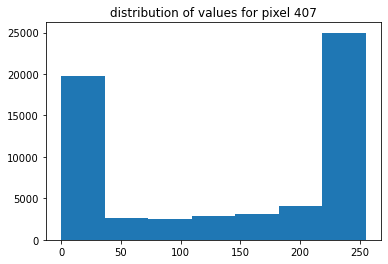

In [9]:
high_med = -1
high_i = -1
for i in range(0,X_train.shape[1]):
    arr = np.histogram(X_train[:,i], bins = np.linspace(0, 255, 8))
    med = np.median(arr[0])
    if med > high_med:
        high_med = med
        high_i = i

print('High median = %i, index = %i' % (high_med, high_i))
plt.hist(X_train[:,high_i], bins = np.linspace(0, 255, 8)) 
plt.title("distribution of values for pixel 407") 
plt.show()

Examining the distribution of the first pixel

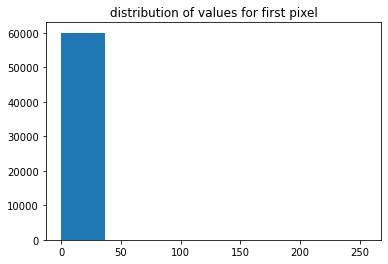

In [10]:
plt.hist(X_train[:,0], bins = np.linspace(0, 255, 8)) 
plt.title("distribution of values for first pixel") 
plt.show()

## 3. Training Multinomial NB model

Multinomial Naive Bayes is used because the data is discrete in nature. 

Gaussian Naive Bayes would have been used for continuous data.

In [11]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha = 1)
clf_mnb = mnb.fit(X_train, Y_train)

Training Accuracy with Naive Bayes

In [12]:
from sklearn.metrics import accuracy_score
y_pred = clf_mnb.predict(X_train)
print('Accuracy with train data: %0.5f' % accuracy_score(Y_train, y_pred))

Accuracy with train data: 0.82528


## 4. NB Model Evaluation

Test Accuracy with Naive Bayes

In [13]:
y_test_pred = clf_mnb.predict(x_test)
print('Accuracy with test data: %0.5f' % accuracy_score(y_test, y_test_pred))

Accuracy with test data: 0.83650


### Confusion Matrix

#### Confusion Matrix with train data

In [14]:
from sklearn.metrics import confusion_matrix
# Ref https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a
print('Confusion matrix for NB')
conf_matrix_nb_train = confusion_matrix(Y_train, y_pred)
print(conf_matrix_nb_train)

Confusion matrix for NB
[[5360    4   31   16   10   85  101    0  311    5]
 [   0 6304   46   41    6   28   33    3  264   17]
 [  79   81 4941  128   65    8  269   46  325   16]
 [  35  116  295 4955   12  123   58   48  290  199]
 [  19   19   37    5 4339   17  118   14  233 1041]
 [ 157   45   46  647  107 3608  129   11  471  200]
 [  59  114   86    3   28  135 5412    0   80    1]
 [  39  104   43   24  151    1    7 5159  198  539]
 [  35  333   95  313   73  208   49   14 4501  230]
 [  44   52   23   76  392   21    3  167  233 4938]]


Visualizing NB Confusion Matrix (Train)

In [15]:
def plot_confusion_matrix(conf_matrix, title = ''):
    '''
    Plots a heatmap using the provided confusion matrix \n
    conf_matrix -> Confusion Matrix \n
    title -> Title for the plot
    '''
    sns.set(rc={'figure.figsize':(11,10)})
    ax = sns.heatmap(conf_matrix, 
                 cmap = 'viridis', 
                 annot  = True, 
                 fmt = 'g'
                 )
    ax.set(xlabel = 'Predicted Digit', 
           ylabel = 'Actual Digit')
    ax.set_title(title, size = 16)
    plt.show()

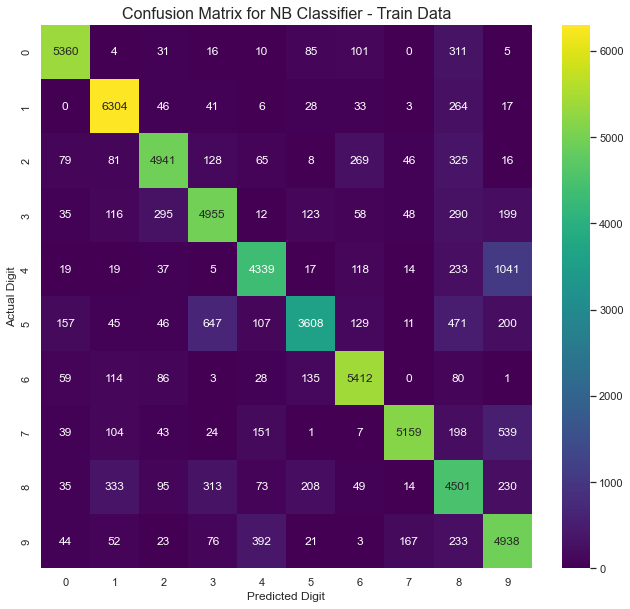

In [16]:
plot_confusion_matrix(
    conf_matrix_nb_train,
    title = 'Confusion Matrix for NB Classifier - Train Data'
    )

#### Confusion Matrix with test data

In [17]:
from sklearn.metrics import confusion_matrix
# Ref https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a
print('Confusion matrix for NB')
conf_matrix_nb = confusion_matrix(y_test, y_test_pred)
print(conf_matrix_nb)

Confusion matrix for NB
[[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    2    6    0   51    1]
 [  15   11  858   24   10    3   33   11   66    1]
 [   4   11   34  851    1   21    7   14   40   27]
 [   2    2    6    0  732    0   25    1   38  176]
 [  23   11    6  107   18  590   17    6   78   36]
 [  17   13   17    1    7   25  860    0   18    0]
 [   1   21   11    5   19    0    1  861   40   69]
 [   6   26   13   54   14   27    8    9  777   40]
 [   6    7    3   10   66   10    0   17   27  863]]


Visualizing NB Confusion Matrix (test)

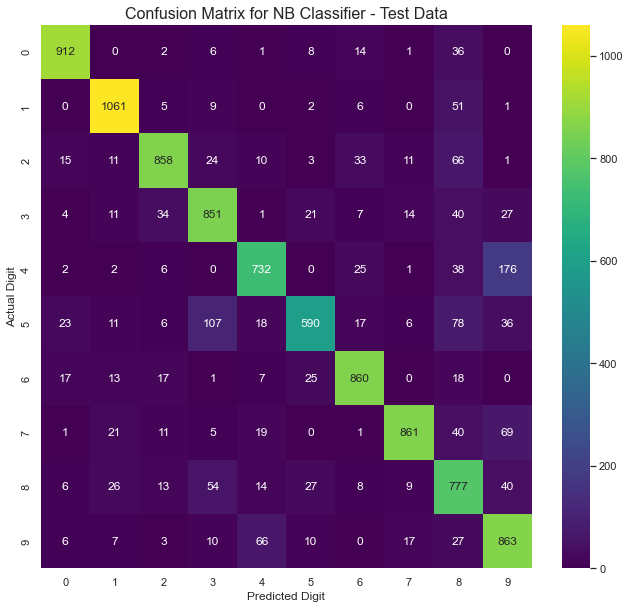

In [18]:
plot_confusion_matrix(
        conf_matrix_nb,
        title = 'Confusion Matrix for NB Classifier - Test Data'        
)

### Errors - Where does the model make mistakes?

#### Errors in train data

In [19]:
conf_matrix_nb_errors_train = conf_matrix_nb_train.copy()
# Setting the diagonal to zero to ignore all occurences where we have the correct prediction
np.fill_diagonal(conf_matrix_nb_errors_train, 0)

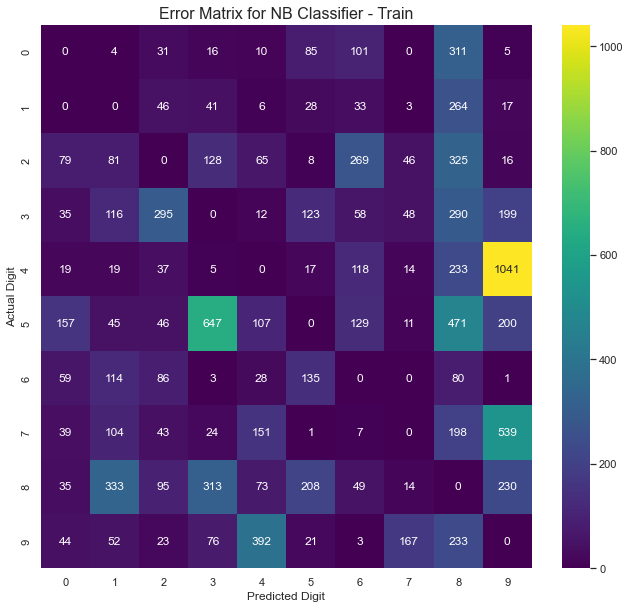

In [20]:
plot_confusion_matrix(
        conf_matrix_nb_errors_train,
        'Error Matrix for NB Classifier - Train'
        )

#### Errors in test data

In [21]:
conf_matrix_nb_errors = conf_matrix_nb.copy()
# Setting the diagonal to zero to ignore all occurences where we have the correct prediction
np.fill_diagonal(conf_matrix_nb_errors, 0)

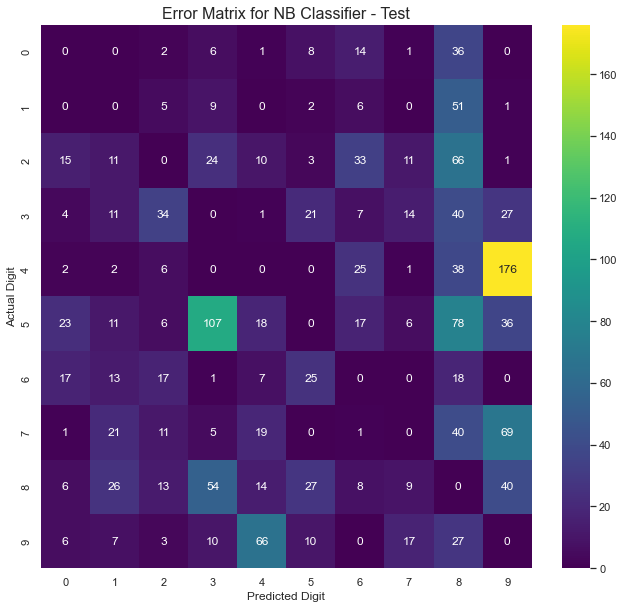

In [22]:
plot_confusion_matrix(
       conf_matrix_nb_errors,
       'Error Matrix for NB Classifier - Test'
       )

#### Inferences

* The error patterns are similar in train and test data
* We can note that the model makes the most mistakes in predicting 4s, incorrectly classifying them as 9. 
* It can also be observed that the number 8 is in general poorly predicted as well as incorrectly classified. 
* The number 5 is also often misinterpreted as 3

### Additional Evaluation Metrics

#### Precision/Recall

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.75      0.79       982
           5       0.86      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.94      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.86      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



As expected, the precision for 8 is very low. When the model predicts an 8, it is correct only 66% of the time.

From the recall numbers, it can be seen that the model has the toughest time predicting 5 correctly, again with 66% of 5s recognized correctly. 

#### ROC Curve

In [24]:
# Probabilities of each predicted output
y_test_pred_prob = clf_mnb.predict_proba(x_test)[:,1]

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob, pos_label = 1.)

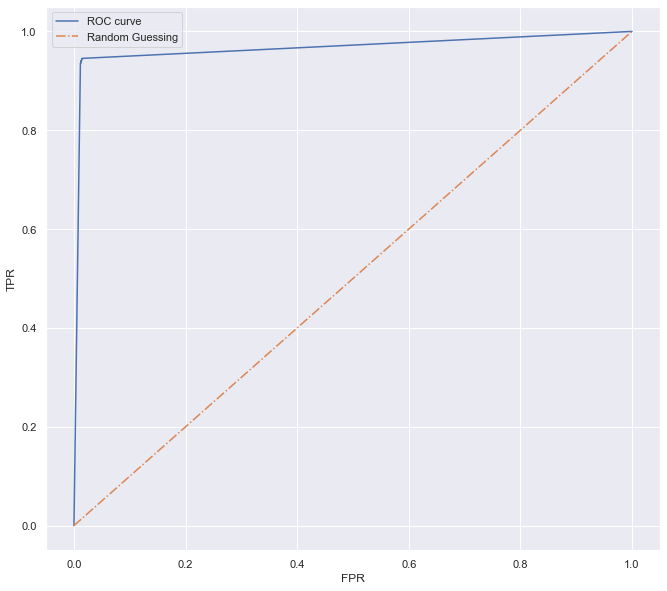

In [26]:
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1], [0,1], '-.', label = 'Random Guessing')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

Ideally, a model would have a TPR of 1.0 when the FPR is 0. This would lead to a 100% accuracy. 

The goal should be to maximize the area under ROC curve. We can benchmark model performance against the straight line going through origin, which helps us compare our model performance against a purely random guess (50-50 chance of making the right prediction).

## 5. Training Logistic Regression Model 

### Scaling

In [27]:
# To aid convergence of the LR model, we will apply scaling on the data
from sklearn.preprocessing import StandardScaler
# Using standard scaler to transform the data so it is centered around 0 mean
scaler = StandardScaler();
X_train_scaled = scaler.fit_transform(X_train)

### Training

In [28]:
from sklearn.linear_model import LogisticRegression
# We will be using the default solver lbfgs
clf_lr = LogisticRegression(random_state=0, 
                            max_iter=50, 
                            n_jobs = -1, # Use all CPUs
                            tol = 0.1 # Increasing tolerance to avoid overfit
                            )
clf_lr.fit(X_train_scaled, Y_train)
Y_pred_lr = clf_lr.predict(X_train_scaled)

### Training Accurracy with LR 

In [29]:
print('Accuracy with train data: %0.5f' % accuracy_score(Y_train, Y_pred_lr))

Accuracy with train data: 0.94007


## 6. LR Model Evaluation

Scaling test data

In [30]:
x_test_scaled = scaler.transform(x_test)

Test Accuracy with LR

In [31]:
y_test_pred_lr = clf_lr.predict(x_test_scaled)
print('Accuracy with test data: %0.5f' % accuracy_score(y_test, y_test_pred_lr))

Accuracy with test data: 0.92480


### Confusion Matrix

#### Confusion Matrix with train data

In [32]:
print('Confusion matrix for LR')
conf_matrix_lr_train = confusion_matrix(Y_train, Y_pred_lr)
print(conf_matrix_lr_train)

Confusion matrix for LR
[[5791    1   14    8    8   27   33    6   32    3]
 [   1 6595   27   17    8   21    3   14   46   10]
 [  24   48 5514   79   51   24   44   47  111   16]
 [  17   24  115 5595    7  175   15   44   96   43]
 [  11   24   29   11 5533    7   37   13   31  146]
 [  34   19   37  134   43 4942   66   13  104   29]
 [  27   13   34    4   32   64 5719    2   21    2]
 [   9   21   47   19   44    7    3 5954   12  149]
 [  26  111   60  125   19  120   32   17 5282   59]
 [  14   23   10   65  127   36    3  155   37 5479]]


Visualizing LR Confusion Matrix (Train)

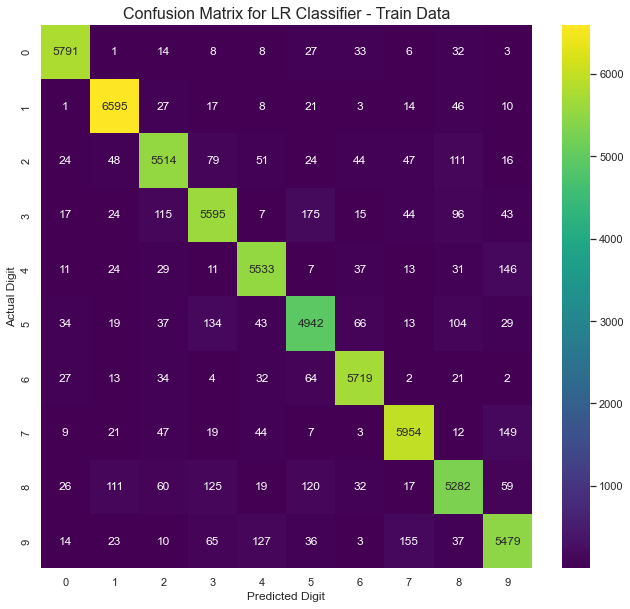

In [33]:
plot_confusion_matrix(
       conf_matrix_lr_train,
       'Confusion Matrix for LR Classifier - Train Data'
       )

#### Confusion Matrix with test data

In [34]:
print('Confusion matrix for LR')
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
print(conf_matrix_lr)

Confusion matrix for LR
[[ 952    0    1    1    4    8    7    5    1    1]
 [   0 1111    6    2    0    1    3    1   11    0]
 [   7    7  922   18    9    4   13   11   37    4]
 [   4    2   20  919    3   25    1   11   20    5]
 [   1    2   10    2  917    0    7    6    7   30]
 [   8    3    1   35    8  777   15    9   33    3]
 [  11    3    8    1    6   13  913    1    2    0]
 [   0   10   21    7    4    1    0  954    1   30]
 [   8   11    6   22    7   27   11   12  859   11]
 [   9    8    0   10   19    7    0   24    8  924]]


Visualizing LR Confusion Matrix (test)

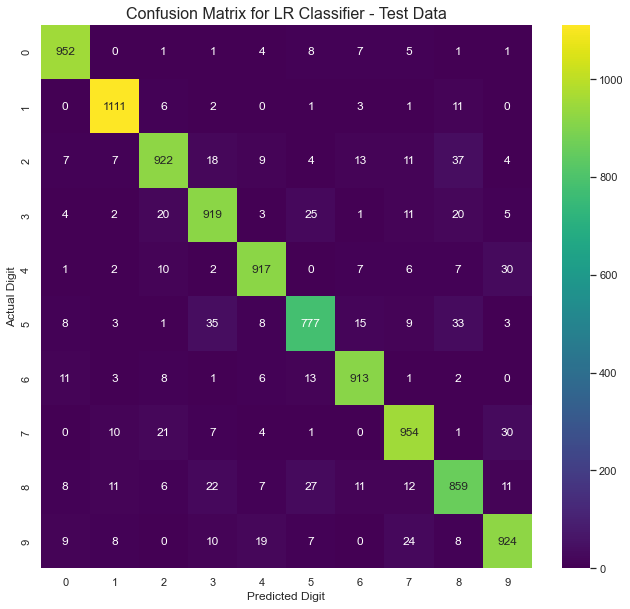

In [35]:
plot_confusion_matrix(
       conf_matrix_lr,
       'Confusion Matrix for LR Classifier - Test Data'
       )

### Errors - Where does the model make mistakes?

#### Errors in train data

In [36]:
conf_matrix_lr_errors_train = conf_matrix_lr_train.copy()
# Setting the diagonal to zero to ignore all occurences where we have the correct prediction
np.fill_diagonal(conf_matrix_lr_errors_train, 0)

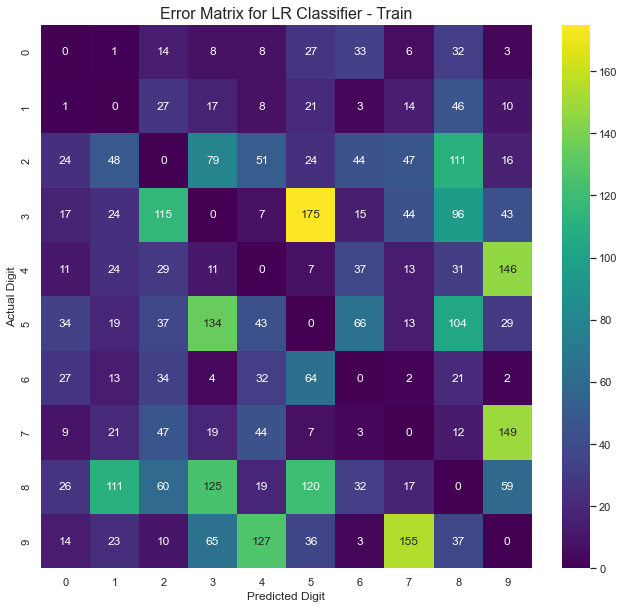

In [37]:
plot_confusion_matrix(
       conf_matrix_lr_errors_train,
       'Error Matrix for LR Classifier - Train'
       )

#### Errors in test data

In [38]:
conf_matrix_lr_errors = conf_matrix_lr.copy()
# Setting the diagonal to zero to ignore all occurences where we have the correct prediction
np.fill_diagonal(conf_matrix_lr_errors, 0)

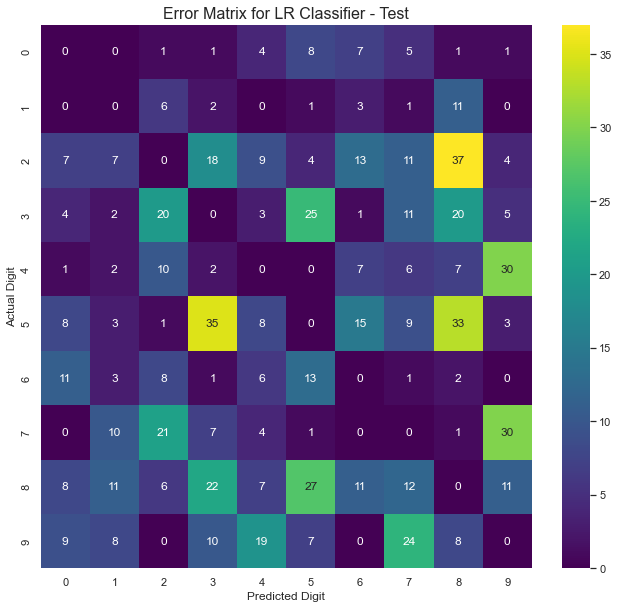

In [39]:
plot_confusion_matrix(
       conf_matrix_lr_errors,
       'Error Matrix for LR Classifier - Test'
       )

#### Inferences

* The error patterns are still similar with train and test data.
* Some of the drawbacks of NB can still be seen in LR, such as incorrectly predicting 5 as 3, 4 as 9 etc.
* The predictive power for the label 8 appears to have gotten slightly better.

### Additional Evaluation Metrics

#### Precision/Recall

In [40]:
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.92      0.93      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



* A general improvement in both precision and recall is observed (compared with Naive Bayes)

#### ROC Curve

In [41]:
# Probabilities of each predicted output
y_test_pred_prob_lr = clf_lr.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob_lr, pos_label = 1.)

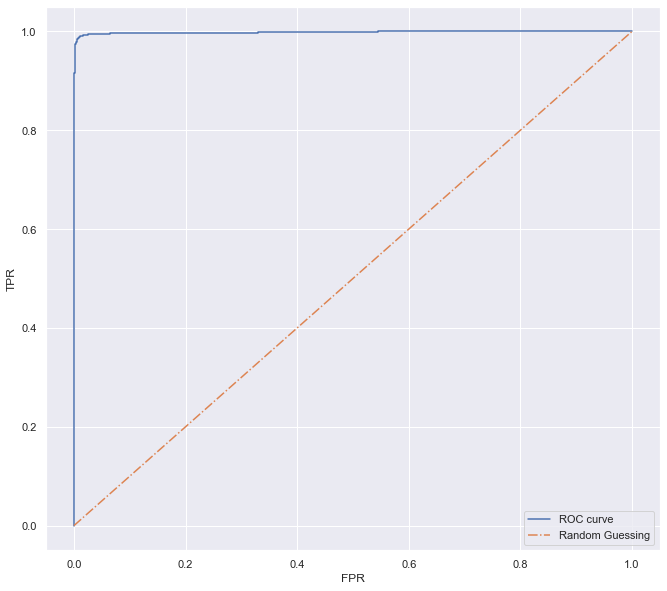

In [42]:
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1], [0,1], '-.', label = 'Random Guessing')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

We see an ROC curve much closer to the upper left corner, indicating better performance. 

## 7. Exploring common misclassifications

We can see a trend in the mistakes both the models make in recognition.

Let's examine what the data behind these mistakes looks like. We will use the predictions from the Logistic Regression model for this analaysis

In [43]:
predictions  = pd.DataFrame({
    'y_test' : y_test,
    'y_test_pred' : y_test_pred_lr
})

### Identifying trends

Let's examine where the model goes wrong

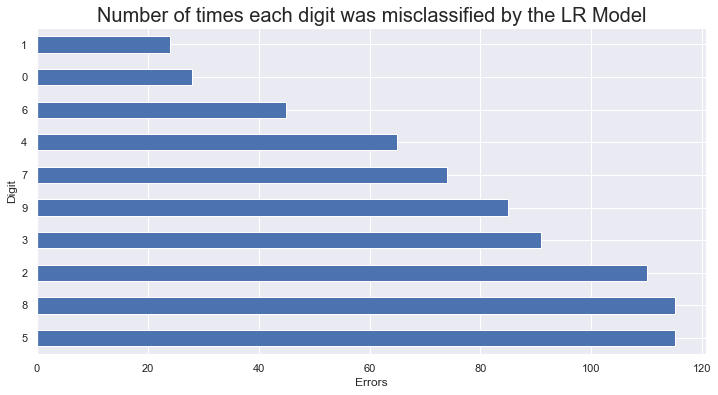

In [44]:
errors = predictions[
    predictions.y_test != predictions.y_test_pred
]
counts = errors.y_test.value_counts()
plt.figure(figsize = (12,6))
plt.title('Number of times each digit was misclassified by the LR Model', size = 20)
plt.xlabel('Errors')
plt.ylabel('Digit')
counts.plot.barh()
plt.show()

The digits 2, 8, and 5 seem to be the most error-prone ones.

Let's see what the model thinks these digits look like

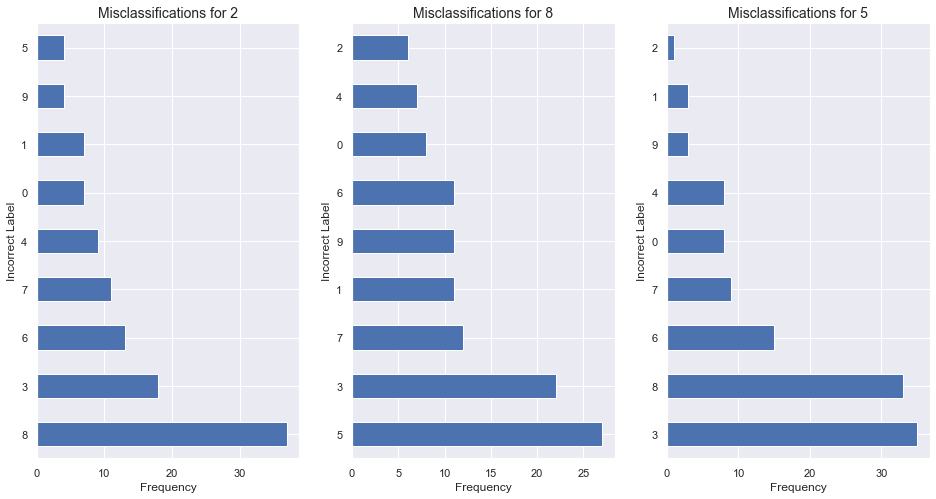

In [45]:
plt.figure(figsize = (16, 8))
numbers = [2, 8, 5]
for i, num in enumerate(numbers):
    plt.subplot(1,3,i+1)
    plt.title('Misclassifications for ' + str(numbers[i]), size = 14)
    plt.ylabel('Incorrect Label')
    plt.xlabel('Frequency')
    errors[errors.y_test == num]['y_test_pred'].value_counts().plot.barh()

### Looking for a reason for errors

Let's see why some of the digits were misclassified

#### 2 misclassified as 8

In [46]:
errors_2_as_8 = errors[
    (errors.y_test == 2)
    & (errors.y_test_pred == 8)
    ]
# We can pick out a sample of 20 misclassified 2s
sample = list(errors_2_as_8.index)[:20]

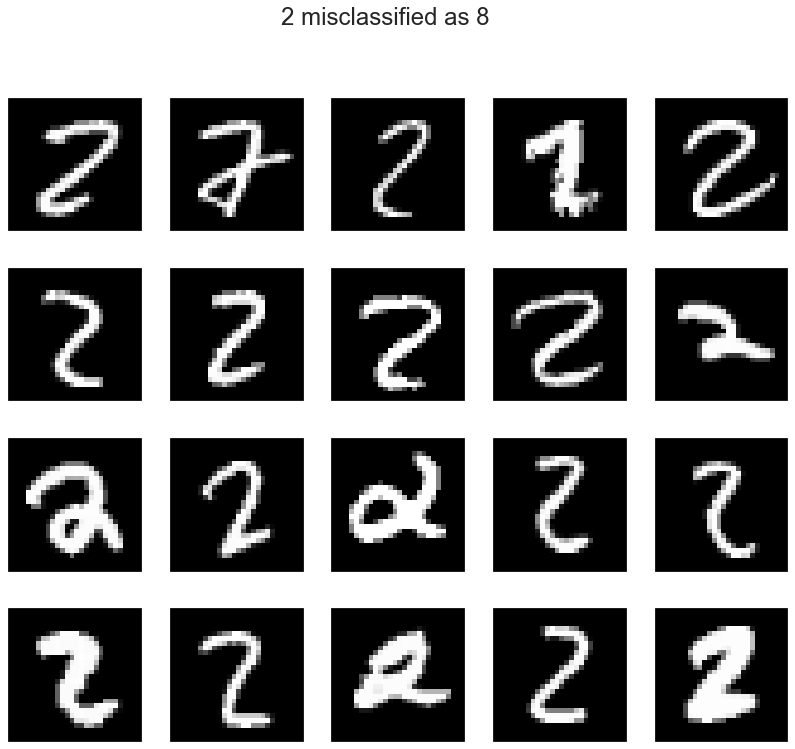

In [47]:
# Let's visualize some of these 2s that were read as 8 by the model
plot_images(indices = sample, x = x_test)
plt.suptitle('2 misclassified as 8', size = 24)
plt.show()    

We can observe all of these 2s are very poorly written, and closely resemble 8s!

#### 8 misclassified as 5

In [48]:
errors_8_as_5 = errors[
    (errors.y_test == 8)
    & (errors.y_test_pred == 5)
    ]
# We can pick out a sample of 20 misclassified 8s
sample = list(errors_8_as_5.index)[:20]

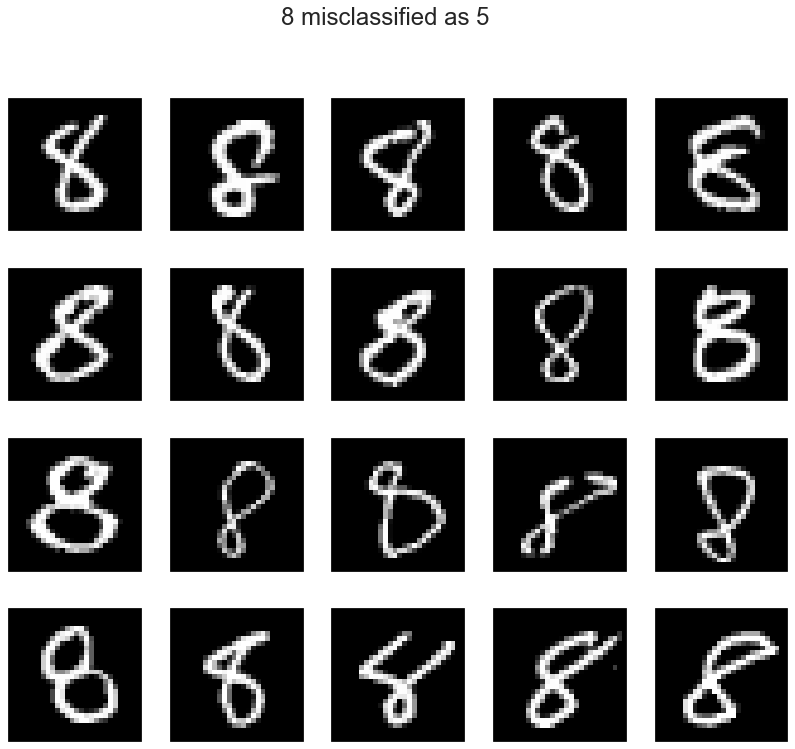

In [49]:
# Let's visualize some of these 8s that were read as 5 by the model
plot_images(indices = sample, x = x_test)
plt.suptitle('8 misclassified as 5', size = 24)
plt.show()

As expected, these 8s are poorly drawn as well and resemble 5 in some aspects

#### 5 misclassified as 3

In [50]:
errors_5_as_3 = errors[
    (errors.y_test == 5)
    & (errors.y_test_pred == 3)
    ]
# We can pick out a sample of 20 misclassified 5s
sample = list(errors_5_as_3.index)[:20]

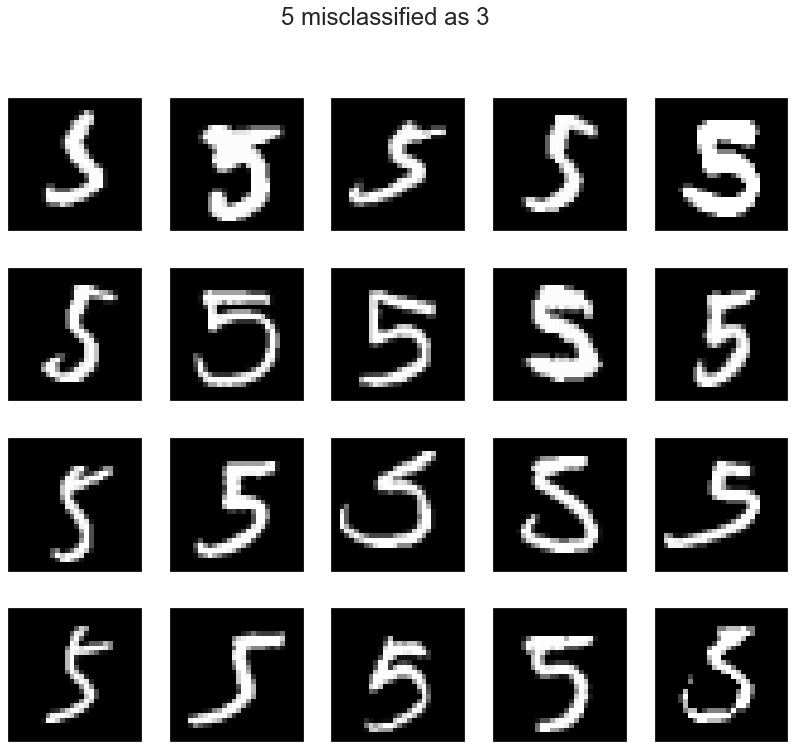

In [51]:
# Let's visualize some of these 5s that were read as 3
plot_images(indices = sample, x = x_test)
plt.suptitle('5 misclassified as 3', size = 24)
plt.show()

Yet again, our hypothesis is correct. All these 5s have a close resemblance to a 3.

## 8. Writing models to files

In [52]:
import pickle
pickle.dump(clf_mnb, open('nb.model', 'wb'))
pickle.dump(clf_lr, open('lr.model', 'wb'))